In [3]:
#IMPORTING NECESSARY LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
from scipy import stats
import random
    

In [4]:
df = pd.read_excel('C:/Users/shubh/Desktop/project.xlsx','Sheet1')
df 

,District,Rural /urban classification,"Sex ratio of the total population (females per 1,000 males)",Sex ratio at birth for children born in the last five years,Women who are literate (%),Men who are literate (%),Women with 10 or more years of schooling (%),Households with an improved drinking-water source1 (%),Households using improved sanitation facility2 (%),Households using clean fuel for cooking3,Quality of life indicator,Institutional births (%)
0,Bhiwani,rural,980,999,76.2,87.3,45.3,89.8,82.6,33.4,0.616500,87.2
1,Mewat,rural,933,891,35.6,78.0,12.6,78.9,46.7,17.2,0.189502,37.6
2,Rohtak,both,916,930,78.0,89.0,46.7,98.3,77.0,45.8,0.695506,86.3
3,Sirsa,rural,913,847,70.3,79.0,36.2,98.2,79.5,41.8,0.693248,85.1
4,Fatehabad,rural,908,922,71.8,87.3,38.3,99.8,87.5,39.1,0.750589,91.2
5,Jhajjar,rural,894,713,82.5,94.8,53.2,93.0,86.4,43.9,0.720423,86.9
6,Rewari,rural,894,704,77.6,97.9,43.1,93.5,69.7,39.1,0.573708,90.2
7,Jind,rural,894,1003,77.2,89.5,47.9,91.4,84.6,36.8,0.659785,92.9
8,Kurukshetra,rural,892,823,80.4,92.0,49.5,99.8,86.0,59.1,0.841239,91.7
9,Kaithal,rural,889,949,73.1,84.9,40.8,98.8,78.0,41.1,0.682483,83.6


In [5]:
#MIN_MAX scaling. the reason for choosing min_max scaling to bring about relative differences between districts
#and also allow us to compare data points by sclaing them in the interval(0,1)

df['sex ratio scaled'] = (df['Sex ratio of the total population (females per 1,000 males)'] - min(df['Sex ratio of the total population (females per 1,000 males)']))/(max(df['Sex ratio of the total population (females per 1,000 males)'])-min(df['Sex ratio of the total population (females per 1,000 males)']))
df['Child sex ratio scaled'] = (df['Sex ratio at birth for children born in the last five years'] - min(df['Sex ratio at birth for children born in the last five years']))/(max(df['Sex ratio at birth for children born in the last five years'])-min(df['Sex ratio at birth for children born in the last five years']))
df['Mens Literacy rate scaled'] = ((df['Men who are literate (%)'] - min(df['Men who are literate (%)']))/(max(df['Men who are literate (%)'])-min(df['Men who are literate (%)'])))
df['Womens Literacy rate scaled'] = (df['Women who are literate (%)'] - min(df['Women who are literate (%)']))/(max(df['Women who are literate (%)'])-min(df['Women who are literate (%)']))
df['Women with > 10 years of schooling scaled'] = (df['Women with 10 or more years of schooling (%)'] - min(df['Women with 10 or more years of schooling (%)']))/(max(df['Women with 10 or more years of schooling (%)'])-min(df['Women with 10 or more years of schooling (%)']))
df['Institutional births'] = (df['Institutional births (%)'] - min(df['Institutional births (%)']))/(max(df['Institutional births (%)'])-min(df['Institutional births (%)']))


In [6]:
# Rural urban classification is a categorical variable whuch needs to be accounted for. hence categorical variable encoding
# also encoding by 0.5 instead of one because since all data points have beeen scaled in the interval 0,1(uniform) distribution
# its suitable to encide categorical variables by 0.5. Value of 1 may lead to categorical variable playing a dominant role in 
# classification algorithm(k-means)

df.loc[df['Rural /urban classification'] == 'rural', 'ruc1'] = .5
df.loc[df['Rural /urban classification'] != 'rural', 'ruc1'] = 0
df.loc[df['Rural /urban classification'] == 'urban', 'ruc2'] = .5
df.loc[df['Rural /urban classification'] != 'urban', 'ruc2'] = 0
#df.loc[df['Rural /urban classification'] == 'both', 'ruc3'] = 1 # dummy variable trap.if its both then it automatically becomes 0
#df.loc[df['Rural /urban classification'] != 'both', 'ruc3'] = 0
Scale_df = df[['District','ruc1','ruc2','sex ratio scaled','Child sex ratio scaled','Mens Literacy rate scaled','Womens Literacy rate scaled',
            'Women with > 10 years of schooling scaled','Quality of life indicator','Institutional births']]



In [7]:
#extrapolatory data analysis
#SInce we are intrested in Sex ratio and child sex ratio, our foccus would be relationship of these variables 
#with other variables
Scale_df.corr()

,ruc1,ruc2,sex ratio scaled,Child sex ratio scaled,Mens Literacy rate scaled,Womens Literacy rate scaled,Women with > 10 years of schooling scaled,Quality of life indicator,Institutional births
ruc1,1.000000,-0.508747,0.647168,0.237770,-0.355838,-0.402385,-0.502248,-0.503321,-0.167910
ruc2,-0.508747,1.000000,-0.696099,-0.277114,0.406515,0.258887,0.438032,0.315473,0.023660
sex ratio scaled,0.647168,-0.696099,1.000000,0.395771,-0.575497,-0.406306,-0.589007,-0.496816,-0.136426
Child sex ratio scaled,0.237770,-0.277114,0.395771,1.000000,-0.594225,-0.334362,-0.289243,-0.121677,-0.257226
Mens Literacy rate scaled,-0.355838,0.406515,-0.575497,-0.594225,1.000000,0.671382,0.700838,0.434231,0.411665
Womens Literacy rate scaled,-0.402385,0.258887,-0.406306,-0.334362,0.671382,1.000000,0.929615,0.840835,0.880517
Women with > 10 years of schooling scaled,-0.502248,0.438032,-0.589007,-0.289243,0.700838,0.929615,1.000000,0.855486,0.739620
Quality of life indicator,-0.503321,0.315473,-0.496816,-0.121677,0.434231,0.840835,0.855486,1.000000,0.728691
Institutional births,-0.167910,0.023660,-0.136426,-0.257226,0.411665,0.880517,0.739620,0.728691,1.000000


In [8]:
def regressions(pd1 , pd2, x,y):
    data1 = pd.DataFrame(pd1)
    data2 = pd.DataFrame(pd2)
    plt.scatter(data1,data2, c ='Red')
    cov = (((data1*data2).mean())-(data1.mean()*data2.mean())).mean()
    slope = cov/data1.var()
    lm = (data1)* slope
    z= (data2 - lm).mean()
    lm = lm+z
    plt.scatter(data1 ,lm)
    plt.xlabel(x)
    plt.ylabel(y)
    R2 = ((lm - data2)**2).sum()/(((data2-data2.mean())**2).sum())
    R2 = 1- R2
    print(" Slope is ", slope)
    print("The R^2 value for the above regression is",R2)
    file_name = (str('%.3f'%slope[0])+'.png')
    #plt.savefig(file_name)
    bootstrap(data1,data2,slope)

In [9]:
def bootstrap(x,y,slope):
   X = pd.DataFrame(x)
   Y = pd.DataFrame(y)
   Z = pd.merge(X, Y, left_index=True, right_index=True)
   Z.rename(columns = {'0_x': 'X'}, inplace = True)
   Z.rename(columns = {'0_y': 'Y'}, inplace = True)
   s= []
   for j in range(0,300):
         BS = Z[['X','Y']].sample(frac = 1.5, replace = True)
         slope1 = (BS.cov().loc['X','Y'])/(BS['X'].var())
         s.append(slope1)
   #s= pd.DataFrame(s)
   t_value,p_value=stats.ttest_1samp(s,slope)
   print("The P_value of slope is ",p_value)
   if (p_value > 0.05):
        print("NOT STATISICALLY SIGNIFICANT")
   else :
    print("STATISICALLY SIGNIFICANT")

   
   

 Slope is  0   -0.451064
dtype: float64
The R^2 value for the above regression is 0    0.330446
dtype: float64
The P_value of slope is  [1.03042515e-05]
STATISICALLY SIGNIFICANT


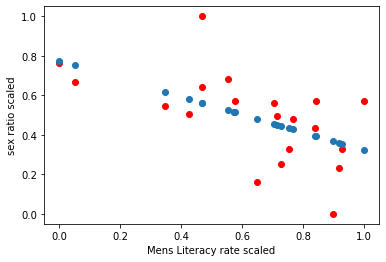

In [10]:
regressions(Scale_df['Mens Literacy rate scaled'].values, Scale_df['sex ratio scaled'].values,'Mens Literacy rate scaled','sex ratio scaled')

 Slope is  0   -0.421794
dtype: float64
The R^2 value for the above regression is 0    0.16471
dtype: float64
The P_value of slope is  [6.0993493e-07]
STATISICALLY SIGNIFICANT


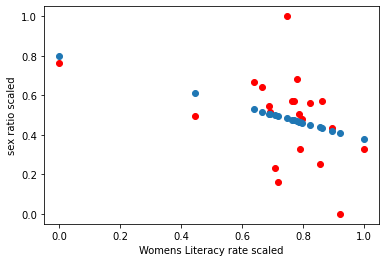

In [11]:
regressions(Scale_df['Womens Literacy rate scaled'].values, Scale_df['sex ratio scaled'].values,'Womens Literacy rate scaled','sex ratio scaled')

 Slope is  0   -0.628449
dtype: float64
The R^2 value for the above regression is 0    0.246266
dtype: float64
The P_value of slope is  [4.57247554e-08]
STATISICALLY SIGNIFICANT


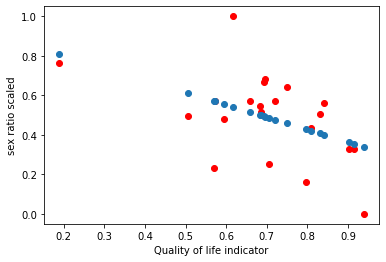

In [12]:
regressions(Scale_df['Quality of life indicator'].values, Scale_df['sex ratio scaled'].values,'Quality of life indicator','sex ratio scaled')

 Slope is  0   -0.606122
dtype: float64
The R^2 value for the above regression is 0    0.352302
dtype: float64
The P_value of slope is  [2.28629347e-11]
STATISICALLY SIGNIFICANT


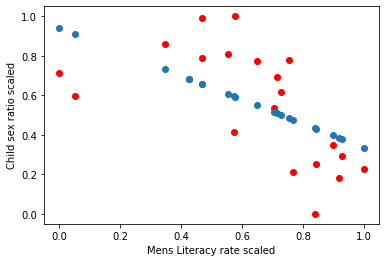

In [13]:
regressions(Scale_df['Mens Literacy rate scaled'].values, Scale_df['Child sex ratio scaled'].values,'Mens Literacy rate scaled','Child sex ratio scaled')

 Slope is  0   -0.45173
dtype: float64
The R^2 value for the above regression is 0    0.111545
dtype: float64
The P_value of slope is  [3.35e-12]
STATISICALLY SIGNIFICANT


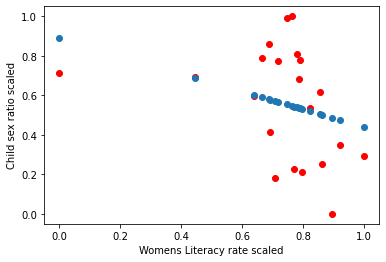

In [30]:
regressions(Scale_df['Womens Literacy rate scaled'].values, Scale_df['Child sex ratio scaled'].values,'Womens Literacy rate scaled','Child sex ratio scaled')

 Slope is  0   -0.200307
dtype: float64
The R^2 value for the above regression is 0    0.014772
dtype: float64
The P_value of slope is  [0.36394616]
NOT STATISICALLY SIGNIFICANT


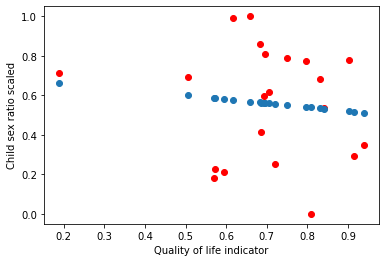

In [15]:
regressions(Scale_df['Quality of life indicator'].values, Scale_df['Child sex ratio scaled'].values,'Quality of life indicator','Child sex ratio scaled')

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [17]:
x= Scale_df.loc[:,['Womens Literacy rate scaled','Mens Literacy rate scaled',]]#'Institutional births','Quality of life indicator']]
y= Scale_df.loc[:,['sex ratio scaled']]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)


In [19]:
regressor1 = LinearRegression()
regressor1.fit(x_train,y_train) # fitting regression line



LinearRegression()

In [20]:
z=(max(df['Sex ratio of the total population (females per 1,000 males)'])-min(df['Sex ratio of the total population (females per 1,000 males)']))
a = min(df['Sex ratio of the total population (females per 1,000 males)'])

y_pred = regressor1.predict(x_test) #predicting using linear regression
regressor1.coef_
r2_score(y_test,y_pred)

0.2056780913808035

In [21]:

np.set_printoptions(precision = 2)
print(np.concatenate(((y_pred),(y_test)),1))


[[0.46 0.33]
 [0.55 0.52]
 [0.79 0.67]
 [0.39 0.23]
 [0.48 0.25]]


In [22]:
x = ((((y_pred - y_test)*(z))**2).mean())**0.5
print("The root mean square error is",x)

The root mean square error is sex ratio scaled    29.798067
dtype: float64


In [23]:
#Using clusterin alogorith to find group together data points and find any underlying pattern in it

Text(0, 0.5, 'wcss')

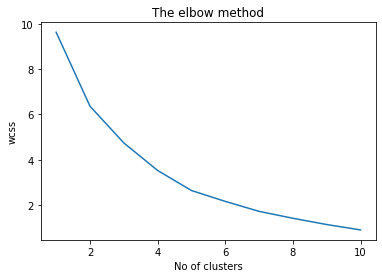

In [24]:
df_clustering = Scale_df[['ruc1','ruc2','sex ratio scaled','Child sex ratio scaled','Mens Literacy rate scaled','Womens Literacy rate scaled',
            'Women with > 10 years of schooling scaled','Quality of life indicator','Institutional births']].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
#the rarte of change of wcss decreases after 5 clusters , so we choose 5 as k in K means

In [25]:
kmeans2 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans1 = KMeans(n_clusters = 1, init = 'k-means++', random_state = 43)
y_kmeans = kmeans2.fit_predict(df_clustering)
wcss2 = kmeans2.inertia_
y_kmeans


array([1, 3, 4, 1, 1, 2, 2, 1, 2, 1, 4, 4, 1, 2, 2, 4, 0, 4, 0, 0, 0])

In [26]:

ser1 = DataFrame(y_kmeans)
ser1
Scale_df = pd.merge(Scale_df, ser1, left_index=True, right_index=True)
Scale_df

,District,ruc1,ruc2,sex ratio scaled,Child sex ratio scaled,Mens Literacy rate scaled,Womens Literacy rate scaled,Women with > 10 years of schooling scaled,Quality of life indicator,Institutional births,0
0,Bhiwani,0.5,0.0,1.000,0.989664,0.467337,0.746324,0.601103,0.616500,0.837838,1
1,Mewat,0.5,0.0,0.765,0.710594,0.000000,0.000000,0.000000,0.189502,0.000000,3
2,Rohtak,0.0,0.0,0.680,0.811370,0.552764,0.779412,0.626838,0.695506,0.822635,4
3,Sirsa,0.5,0.0,0.665,0.596899,0.050251,0.637868,0.433824,0.693248,0.802365,1
4,Fatehabad,0.5,0.0,0.640,0.790698,0.467337,0.665441,0.472426,0.750589,0.905405,1
5,Jhajjar,0.5,0.0,0.570,0.250646,0.844221,0.862132,0.746324,0.720423,0.832770,2
6,Rewari,0.5,0.0,0.570,0.227390,1.000000,0.772059,0.560662,0.573708,0.888514,2
7,Jind,0.5,0.0,0.570,1.000000,0.577889,0.764706,0.648897,0.659785,0.934122,1
8,Kurukshetra,0.5,0.0,0.560,0.534884,0.703518,0.823529,0.678309,0.841239,0.913851,2
9,Kaithal,0.5,0.0,0.545,0.860465,0.346734,0.689338,0.518382,0.682483,0.777027,1


In [27]:
Scale_df.rename(columns = {0: "Cluster Group"}, inplace = True)
df2 = Scale_df. groupby("Cluster Group")["sex ratio scaled","Quality of life indicator","Child sex ratio scaled","Mens Literacy rate scaled","Women with > 10 years of schooling scaled"].mean()
df3 =  df2.sort_values(by='Child sex ratio scaled')
c = df3.index
districs_of_concern = (Scale_df.loc[(Scale_df['Cluster Group'] ==c[0])| (Scale_df['Cluster Group'] ==c[1])]).sort_values(by='Cluster Group')
a= districs_of_concern.index 
df2


<ipython-input-27-f0fbdf272ca0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = Scale_df. groupby("Cluster Group")["sex ratio scaled","Quality of life indicator","Child sex ratio scaled","Mens Literacy rate scaled","Women with > 10 years of schooling scaled"].mean()


,sex ratio scaled,Quality of life indicator,Child sex ratio scaled,Mens Literacy rate scaled,Women with > 10 years of schooling scaled
Cluster Group,,,,,
0,0.1800,0.804649,0.399871,0.849246,0.798713
1,0.6525,0.651474,0.822136,0.437186,0.508885
2,0.5230,0.707457,0.244961,0.831156,0.672426
3,0.7650,0.189502,0.710594,0.000000,0.000000
4,0.4560,0.764078,0.660982,0.607035,0.667279


In [28]:
print("districts of concern")
districs_of_concern
#

districts of concern


,District,ruc1,ruc2,sex ratio scaled,Child sex ratio scaled,Mens Literacy rate scaled,Womens Literacy rate scaled,Women with > 10 years of schooling scaled,Quality of life indicator,Institutional births,Cluster Group
16,Ambala,0.0,0.5,0.330,0.294574,0.929648,1.000000,0.948529,0.914245,0.988176,0
18,Faridabad,0.0,0.5,0.230,0.180879,0.919598,0.709559,0.540441,0.568849,0.581081,0
19,Gurgaon,0.0,0.5,0.160,0.775194,0.648241,0.716912,0.705882,0.796773,0.618243,0
20,Panchkula,0.0,0.5,0.000,0.348837,0.899497,0.920956,1.000000,0.938728,0.994932,0
5,Jhajjar,0.5,0.0,0.570,0.250646,0.844221,0.862132,0.746324,0.720423,0.832770,2
6,Rewari,0.5,0.0,0.570,0.227390,1.000000,0.772059,0.560662,0.573708,0.888514,2
8,Kurukshetra,0.5,0.0,0.560,0.534884,0.703518,0.823529,0.678309,0.841239,0.913851,2
13,Mahendragarh,0.5,0.0,0.480,0.211886,0.768844,0.797794,0.680147,0.593762,1.000000,2
14,Yamunanagar,0.0,0.0,0.435,0.000000,0.839196,0.895221,0.696691,0.808152,0.959459,2


In [29]:
df.iloc[a,[0,1,2,3,4,5,6,7,11]]

,District,Rural /urban classification,"Sex ratio of the total population (females per 1,000 males)",Sex ratio at birth for children born in the last five years,Women who are literate (%),Men who are literate (%),Women with 10 or more years of schooling (%),Households with an improved drinking-water source1 (%),Institutional births (%)
16,Ambala,urban,846,730,90.0,96.5,64.2,99.7,96.1
18,Faridabad,urban,826,686,74.2,96.3,42.0,51.1,72.0
19,Gurgaon,urban,812,916,74.6,90.9,51.0,97.9,74.2
20,Panchkula,urban,780,751,85.7,95.9,67.0,99.5,96.5
5,Jhajjar,rural,894,713,82.5,94.8,53.2,93.0,86.9
6,Rewari,rural,894,704,77.6,97.9,43.1,93.5,90.2
8,Kurukshetra,rural,892,823,80.4,92.0,49.5,99.8,91.7
13,Mahendragarh,rural,876,698,79.0,93.3,49.6,96.0,96.8
14,Yamunanagar,both,867,616,84.3,94.7,50.5,99.7,94.4
